In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings

In [9]:
from cmath import nan


class SpectralDecompositionPowerMethod:
    """
    Store the output vector in the object attribute self.components_ and the assciated eigenvalue in the object attribute self.singular_values_

    Parameters:
        max_iter (int): maximum number of iterations to for the calculation
        tolerance (float): fractional change in solution to stop iteration early
        gamma (float): momentum parameter for the power method
        random_state (int): random seed for reproducibility
        store_intermediate_results (bool): whether to store the intermediate results as the power method iterates
        stored_eigenvalues (list): if store_intermediate_results is active, a list of eigenvalues at each iteration
        stored_eigenvectors (list): if store_intermediate_results is active, a list of eigenvectors at each iteration
    """

    def __init__(self, max_iter=1000, tolerance=1e-5, gamma=0.0, random_state=None, store_intermediate_results=False) -> None:
        np.random.seed(random_state)
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.gamma = gamma
        self.random_state = random_state
        self.store_intermediate_results = store_intermediate_results

        self.stored_intermediate_eigenvalues = []
        self.stored_intermediate_eigenvectors = []

        self.singular_values_ = nan
        self.components_ = nan

    def fit(self, A):
        """ 
        Perform the power method with random initialization, and optionally store intermediate estimates of the eigenvalues and eigenvectors at each iteration.

        Parameters:
        A (np 2d array whose column size = row size)

        Return the leading eigenvalue and the coresponding vector
        """
        size = A.shape[0]
        current_vector = np.random.rand(size)
        current_vector = current_vector / np.linalg.norm(current_vector) # normalize the initial vector
        next_vector = SpectralDecompositionPowerMethod.get_next_vector(current_vector, A)

        iteration = 0

        while (SpectralDecompositionPowerMethod.get_diff(current_vector, next_vector) > self.tolerance and iteration <= self.max_iter):
            if self.store_intermediate_results: # store the intermidiate eigenvalue and eigenvectors when desired
                self.stored_intermediate_eigenvectors.append(current_vector)
                self.stored_intermediate_eigenvalues.append(np.linalg.norm(np.matmul(A, current_vector)))
                
            current_vector = next_vector
            next_vector = SpectralDecompositionPowerMethod.get_next_vector(next_vector, A) # calculate the next vector
            iteration += 1

        eigen_value = np.linalg.norm(np.matmul(A, current_vector))
        self.components_ = current_vector
        self.singular_values_ = eigen_value
            
    @staticmethod
    def get_next_vector(current_vector, A):
        """
        Given a normalized vector with size n and a matrix with size n * n, return the next normalized vector using the rule:
        next_vector = A * current_vector / norm(A * current_vector)
        """
        next_vector = np.matmul(A, current_vector)
        return next_vector / np.linalg.norm(next_vector)

    @staticmethod
    def get_diff(vector_1, vector_2):
        ''' 
        return the 2-norm of the diff vector of vector_1 and vector_2
        '''
        diff = vector_1 - vector_2
        return np.linalg.norm(diff)

    

40.82536005446907
Power method solution: 0.044803937629518634
Numpy solution: 0.04480394024475954


Text(0, 0.5, 'Power method eignenvector')

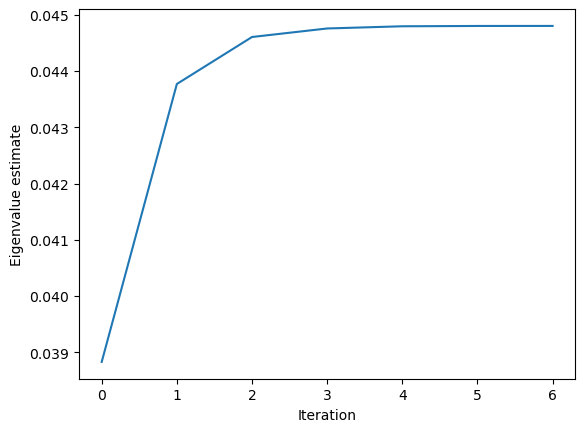

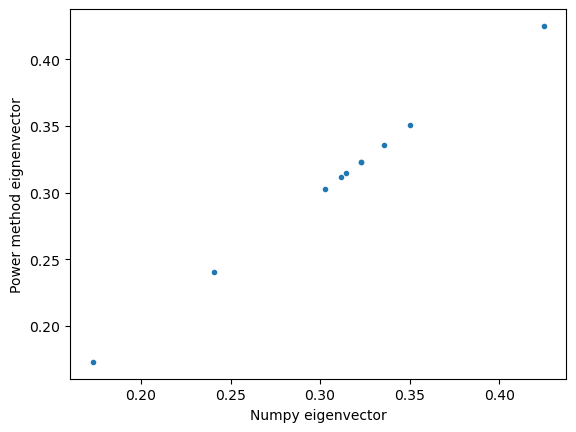

In [10]:
# check the results agianst the np built-in method
# code copied from William
def eigmax_numpy(A):
    """ 
    Compute the maximum eigenvalue and asscociated eigenvector in a matrix with Numpy
    """
    eigsys = np.linalg.eig(A)
    ind = np.abs(eigsys[0]).argmax()
    return np.real(eigsys[0][ind]), np.real(eigsys[1][:, ind])

# test with a random matrix
np.random.seed(2)
mm = np.random.random(size=(10, 10)) / 100

print(np.linalg.cond(mm.T))
model = SpectralDecompositionPowerMethod(store_intermediate_results=True)
model.fit(mm)

print(f"Power method solution: {model.singular_values_}")
print(f"Numpy solution: {eigmax_numpy(mm)[0]}")

plt.figure()
plt.plot(model.stored_intermediate_eigenvalues)
plt.xlabel("Iteration")
plt.ylabel("Eigenvalue estimate")

plt.figure()
plt.plot(eigmax_numpy(mm)[1], model.components_, '.')
plt.xlabel("Numpy eigenvector")
plt.ylabel("Power method eignenvector")

39.69699930917595
Power method solution: 3.8918696341116075
Numpy solution: -3.8918696341116092


Text(0, 0.5, 'Power method eignenvector')

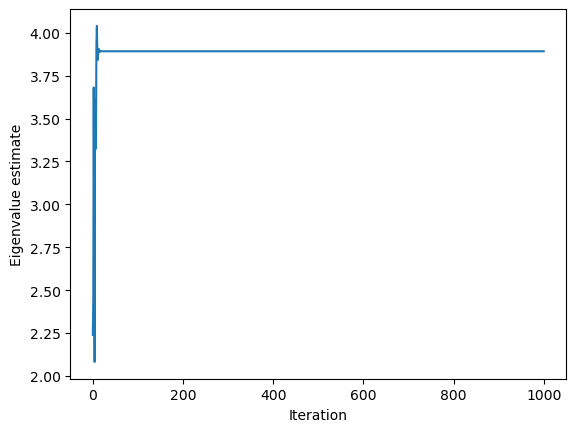

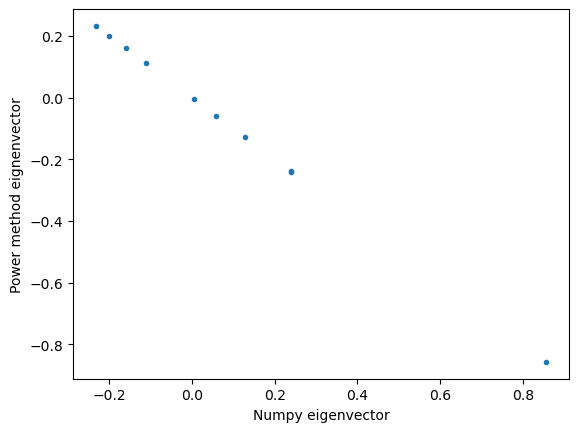

In [11]:
# test with a normal distribution matrix
mm = np.random.normal(size=(10, 10))

print(np.linalg.cond(mm.T))
model = SpectralDecompositionPowerMethod(store_intermediate_results=True)
model.fit(mm)

print(f"Power method solution: {model.singular_values_}")
print(f"Numpy solution: {eigmax_numpy(mm)[0]}")

plt.figure()
plt.plot(model.stored_intermediate_eigenvalues)
plt.xlabel("Iteration")
plt.ylabel("Eigenvalue estimate")

plt.figure()
plt.plot(eigmax_numpy(mm)[1], model.components_, '.')
plt.xlabel("Numpy eigenvector")
plt.ylabel("Power method eignenvector")